In [1]:
import pandas as pd
import numpy as np
import math
import statistics as st
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt

# Teste T para duas amostras independentes

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import scipy

In [4]:
scipy.__version__

'1.6.0'

In [5]:
dados = {'X':[72,58,91,88,70,76,98,101,65,73,79,82,80,91,93,88,97,83,71,74], 
        'Y':[66,40,55,70,76,61,53,50,47,61,52,48,60,72,57,70,66,55,46,51]} 

In [6]:
df = pd.DataFrame(dados)

In [7]:
#Supondo duas amostra independentes que registram, por exemplo, uma nota em prova de acordo com método X e Y de estudo
# Deseja-se saber se o metodo de estudo interfere no resultado da prova
df.head()

,X,Y
0,72,66
1,58,40
2,91,55
3,88,70
4,70,76


In [8]:
from scipy import stats
#Para aplicar o Teste T é necessário que as amostram sejam oriundas de uma população normal, por isso, aplicamos teste Shapiro
statistic ,pvalue = stats.shapiro(df['X'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df['Y'])
print(pvalue)
# Como ambos p-value > 0.05, não rejeitamos a hipótese nula, ou seja, ambas amostras são oriundas de uma dist. normal

0.8734249472618103
0.8089246153831482


In [9]:
print(df['X'].mean())
print(df['Y'].mean()) #verificando a média de cada método e, aparentemente, há uma diferença

81.5
57.8


<AxesSubplot:xlabel='variable', ylabel='value'>

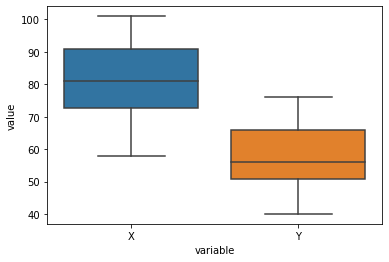

In [10]:
sns.boxplot(x="variable", y="value", data=pd.melt(df)) #comparando os valores pelo boxplot, reforçando a observação acima

In [11]:
#A depender se as variâncias das amostras são iguais ou não, aplicamos um diferente parâmetro no teste
print(st.stdev(df['X']))
print(st.stdev(df['Y']))
# Calculando estes, temos um primeiro indício da diferença, entretanto, é necessário realizar o teste de hipótese

11.736134035757395
9.838699100999074


In [12]:
from scipy.stats import bartlett
# Teste de Bartlett para testar se as variâncias são iguais (hipótese nula é de variâncias iguais)
stat, p = bartlett(df['X'], df['Y'])
print(p)
# Como p-value > 0.05, não rejeitamos a hipótese nula, ou seja, consideramos as variâncias iguais

0.44916035305305846


In [13]:
#Aplicamos o teste T com variâncias iguais (equal_var = True), de forma bicaudal e com H0 sendo médias iguais
stats.ttest_ind(df['X'], df['Y'], equal_var = True, alternative = 'two-sided')
# Como p-value < 0.05, rejeitamos a hipótese nula, ou seja, as médias dos métodos X e Y são diferentes

Ttest_indResult(statistic=6.920824033665959, pvalue=3.147827649441996e-08)

In [14]:
#Teste unicaudal e com H0 sendo a média de X ser igual ou menor que Y
stats.ttest_ind(df['X'], df['Y'], equal_var = True, alternative = 'greater')
# Como p-value < 0.05, rejeitamos a hipótese nula, ou seja, a média de X é maior que Y

Ttest_indResult(statistic=6.920824033665959, pvalue=1.573913824720998e-08)

In [15]:
#Teste unicaudal e com H0 sendo a média de X ser igual ou maior que Y
stats.ttest_ind(df['X'], df['Y'], equal_var = True, alternative = 'less')
# Como p-value > 0.05, não rejeitamos a hipótese nula

Ttest_indResult(statistic=6.920824033665959, pvalue=0.9999999842608618)

# Teste T para duas amostras emparelhadas

In [16]:
dados = {'Antes':[220,212,227,234,204,209,211,245,237,250,208,224,220,218,208,205,227,207,222,213,210,234,240,227,229,224,204,
             210,215,228], 
        'Depois':[195,180,200,204,180,195,200,210,205,211,175,198,195,200,190,200,222,198,201,194,190,204,230,222,209,198,195,
                 190,201,210]}

In [17]:
df = pd.DataFrame(dados)

In [18]:
#No caso de amostras emparalhedas, verificamos a diferença de uma variável em dois momentos: antes e depois, por exemplo, de
# um tratamento com um medicamento
df.head()

,Antes,Depois
0,220,195
1,212,180
2,227,200
3,234,204
4,204,180


In [19]:
from scipy import stats

In [20]:
#Para aplicar o Teste T é necessário que as amostram sejam oriundas de uma população normal, por isso, aplicamos teste Shapiro
statistic ,pvalue = stats.shapiro(df['Antes'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df['Depois'])
print(pvalue)
# Como ambos p-value > 0.05, rejeitamos a hipótese nula, ou seja, ambas amostras são oriundas de uma dist. normal

0.10733503848314285
0.28344228863716125


In [21]:
print(df['Antes'].mean())
print(df['Depois'].mean()) #verificando a média de cada momento e, aparentemente, há uma diferença

220.73333333333332
200.06666666666666


<AxesSubplot:xlabel='variable', ylabel='value'>

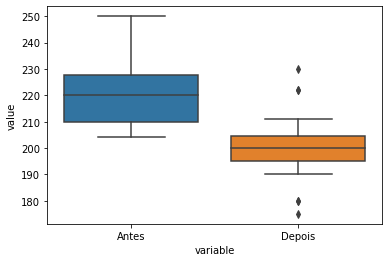

In [22]:
#Observando os dados em cada momento em um boxplot
sns.boxplot(x="variable", y="value", data=pd.melt(df))
#Reforça-se a observação acima de que há uma diferença nos momentos da amostra

In [23]:
df['diferença'] = df['Depois'] - df['Antes'] #observar a variável pela diferença entre os momentos

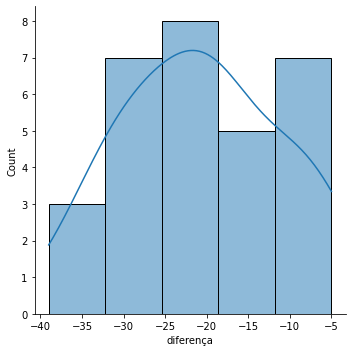

In [24]:
#plotando a diferença de cada par de observação
sns.displot(df["diferença"], bins=5, kde=True)
#Mais uma evidência de que deve haver uma diferença pelo tratamento, dado que a diferença esta bem centrada em valores negativos

In [25]:
#Aplicamos o teste T de forma bicaudal e com H0 sendo médias iguais
stats.ttest_rel(df['Antes'],df['Depois'],alternative='two-sided')
# Como p-value < 0.05, rejeitamos a hipótese nula, ou seja, as médias dos métodos X e Y são diferentes

Ttest_relResult(statistic=11.953297138613197, pvalue=9.960437580616328e-13)

# One-Way ANOVA

In [26]:
from scipy.stats import f_oneway

In [27]:
dados = {'Unidade_1':[24,26,28,22,31,25,27,28,30,21,20,24], 
        'Unidade_2':[28,26,24,30,24,27,25,29,30,27,26,25],
        'Unidade_3':[29,25,24,26,20,22,22,27,20,26,24,25]}

In [28]:
#Neste caso temos 12 avaliações de clientes que compraram em 03 mercados diferentes, e queremos saber se há influência do 
# mercado na avaliação atribuida
df = pd.DataFrame(dados)
df.head(30)

,Unidade_1,Unidade_2,Unidade_3
0,24,28,29
1,26,26,25
2,28,24,24
3,22,30,26
4,31,24,20
5,25,27,22
6,27,25,22
7,28,29,27
8,30,30,20
9,21,27,26


In [29]:
#Para aplicar a ANOVA é necessário que as amostram sejam oriundas de uma população normal, por isso, aplicamos teste Shapiro
statistic ,pvalue = stats.shapiro(df['Unidade_1'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df['Unidade_2'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df['Unidade_3'])
print(pvalue)

0.922930121421814
0.32978665828704834
0.750328004360199


In [30]:
#Outra exigência para este método é a igualdade de variâncias entre as amostras
print(st.stdev(df['Unidade_1']))
print(st.stdev(df['Unidade_2']))
print(st.stdev(df['Unidade_3']))
# Calculando uma primeira evidência desta relação

3.4771984543464143
2.137330535547045
2.757908737804898


In [31]:
#Teste bartlett para verificar a igualdade das variâncias entre as três amostras
stat, p = bartlett(df['Unidade_1'], df['Unidade_2'],df['Unidade_3'])
print(p)

0.29524300365050327


In [32]:
# Uma primeira evidência da relação entre as médias entre as amostras
print(df['Unidade_1'].mean())
print(df['Unidade_2'].mean())
print(df['Unidade_3'].mean())

25.5
26.75
24.166666666666668


<AxesSubplot:xlabel='variable', ylabel='value'>

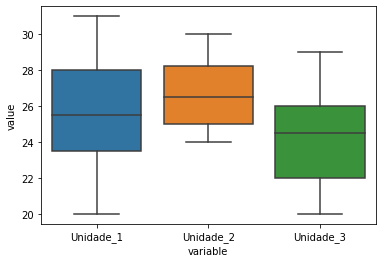

In [33]:
# Outra visualização possível das amostras é o boxplot das avaliações
sns.boxplot(x="variable", y="value", data=pd.melt(df))

In [34]:
#Testa a hipótese nula de que as médias dos grupos são iguais
# A hipótese alternativa é que, ao menos, a média de um grupo é diferente
F, p = f_oneway(df['Unidade_1'], df['Unidade_2'], df['Unidade_3'])
print(p)
# Como p-value > 0.05, não rejeitamos a hipótese nula, ou seja, as médias dos grupos são iguais

0.09955524346963146


# Teste McNemar

In [106]:
dados = {'Antes':['A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B','B'], 
        'Depois':['A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','B','B','B','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B','B','B','B']} 

In [107]:
# Neste cenário, queremos testar se um estado de uma variável binária se altera comparando dois momentos, ou seja, 
# se houve influência da ação (evento) que divide o período
# Neste exemplo, testamos se as observações alternam de A para B, e vice-versa, comparando o antes e depois
df = pd.DataFrame(dados)
df.head()

,Antes,Depois
0,A,A
1,A,A
2,A,A
3,A,A
4,A,A


In [37]:
#Observando uma matriz de frequência dos estados da variável em ambos momentos
df2 = pd.crosstab(df['Antes'],df['Depois'])
df2.head()
# Uma primeira evidência da diferença entre os estados da variável, entre os momentos, são as observações situada nos pares:
# A-B e B-A (antes-depois), que totalizam 24 das 36.
# Além disso, das 24 mudanças, 21 situaram-se no sentido B->A e 3 no sentido A->B

Depois,A,B
Antes,,
A,22,3
B,21,14


In [38]:
from statsmodels.stats.contingency_tables import mcnemar

In [39]:
#Aplicar o teste mcnemar usando uma distribuição qui-quadrada com correção (exact = False; correction = True)
# A hipótese nula deste teste é que a probabilidade de migração das observações entre os estados (A->B e B->A) é igual
# Ja a alternativa é que estas probabilidades são distintas, ou seja, o evento influenciou um dos fluxos a ocorrer, desta forma,
# as direções não são equiprovavéis.
teste_mcnemar = statsmodels.stats.contingency_tables.mcnemar(df2,exact=False,correction=True)
print(teste_mcnemar.pvalue)
print(teste_mcnemar.statistic)
# Como p-value < 0.05, rejeitamos a hipótese nula, ou seja, há diferença na probabilidade da direção da mudança entre os estados

0.0005202443475902309
12.041666666666666


# Teste Wilcoxon

In [40]:
dados = {'Antes':[56,65,70,78,47,52,64,70,72,78,80,26,55,60,71,66,60,17], 
        'Depois':[60,62,74,79,53,59,65,75,75,88,78,26,63,59,71,75,71,24]}

In [41]:
#Neste cenário vamos testar se há diferença significativa de uma métrica diante de um evento
# Um índice de saúde, por exemplo, antes e depois de um tratamento
df = pd.DataFrame(dados)
df.head()

,Antes,Depois
0,56,60
1,65,62
2,70,74
3,78,79
4,47,53


In [48]:
print(st.median(df['Antes']))
print(st.median(df['Depois'])) #uma primeira evidência da diferença entre as medianas

64.5
68.0


<AxesSubplot:xlabel='variable', ylabel='value'>

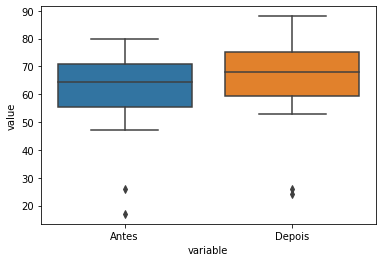

In [43]:
sns.boxplot(x="variable", y="value", data=pd.melt(df)) #observando o boxplot da métrica no antes e depois do evento

In [49]:
df['diferença'] = df['Depois'] - df['Antes'] #criando uma variável da diferença da métrica no par de observações

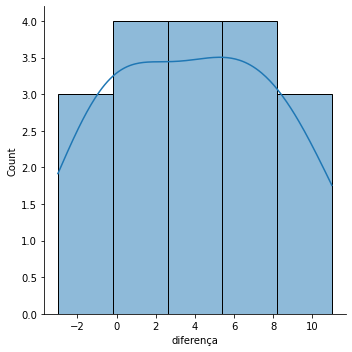

In [50]:
sns.displot(df["diferença"], bins=5, kde=True) #o histograma dessa variável revela certa tendência de uma diferença positiva

In [46]:
from scipy.stats import wilcoxon

In [52]:
# Realizar o teste de Wilcoxon em que a hipótese nula é que a mediana das diferenças das amostras, antes e depois, são iguais
# Realiza-se um teste bicaudal, ou seja, a hipotese alternativa é que a mediana das diferenças é diferente de zero
W, p = wilcoxon(df['Antes'],df['Depois'],zero_method='pratt',alternative='two-sided')
print(p)
# Como p-value < 0.05, rejeitamos a hipótese nula, ou seja, há diferença entre a mediana das diferenças

0.0037084477772417273


# Qui-Quadrado para amostras independentes

In [53]:
df = pd.read_csv('teste_duas_pop.csv', sep=";")

In [54]:
df.head()

,Porte da Empresa,Segmento da Empresa
0,P,B
1,G,B
2,G,D
3,G,C
4,M,D


In [69]:
pd.crosstab(df['Porte da Empresa'],df['Segmento da Empresa'],margins=True)

Segmento da Empresa,A,B,C,D,All
Porte da Empresa,,,,,
G,13,13,13,11,50
M,7,8,8,12,35
P,9,25,17,13,64
All,29,46,38,36,149


In [67]:
(pd.value_counts(df['Segmento da Empresa'])/len(df))

B    0.308725
C    0.255034
D    0.241611
A    0.194631
Name: Segmento da Empresa, dtype: float64

In [66]:
pd.crosstab(df['Porte da Empresa'],df['Segmento da Empresa']).apply(lambda r: r/r.sum(), axis=0)

Segmento da Empresa,A,B,C,D
Porte da Empresa,,,,
G,0.448276,0.282609,0.342105,0.305556
M,0.241379,0.173913,0.210526,0.333333
P,0.310345,0.543478,0.447368,0.361111


In [72]:
from scipy.stats import chi2_contingency

In [73]:
df2 = pd.crosstab(df['Porte da Empresa'],df['Segmento da Empresa'])

In [75]:
chi2, p, dof, ex = chi2_contingency(df2)
print(p)

0.35260425347036484


# Teste U de Mann-Whitney

In [99]:
df = pd.read_csv('teste_duas_pop_2.csv', sep=";")

In [100]:
df.head()

,A,B
0,48,28
1,34,25
2,46,37
3,34,36
4,45,27


In [101]:
print(st.median(df['A']))
print(st.median(df['B'])) #uma primeira evidência da diferença entre as medianas

40
28


<AxesSubplot:xlabel='variable', ylabel='value'>

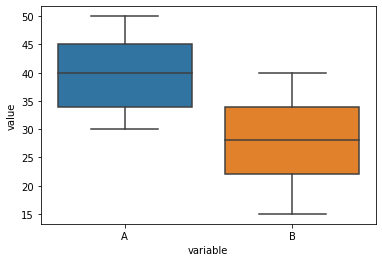

In [102]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

In [103]:
from scipy.stats import mannwhitneyu

In [105]:
stat, p = mannwhitneyu(df['A'], df['B'], alternative = 'two-sided')
print(p)

4.703057917583849e-30
